In [1304]:
import numpy as np
import astropy.io.fits as fits
import astropy.units as u
from IPython.display import clear_output
import time
import sys
from scipy.ndimage import rotate
from scipy.interpolate import RegularGridInterpolator
import h5py
import os
from pathlib import Path
from numpy import inf

from matplotlib.patches import Circle
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from numpy import unravel_index
from photutils.aperture import CircularAperture
from photutils.aperture import ApertureStats
from scipy.ndimage import rotate
from scipy.ndimage import zoom
iwa_mas=432.0641491782519
owa_mas=1440.213830594173

In [1305]:
Main_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/SPC_band/'
sub='best_SED_DHS/'
disk_file_dir=Main_dir+sub

In [1306]:
med_wd_0=fits.getdata(disk_file_dir+'med_wd_I0.fits')
med_wd_90=fits.getdata(disk_file_dir+'med_wd_I90.fits')
med_wd_45=fits.getdata(disk_file_dir+'med_wd_I45.fits')
med_wd_135=fits.getdata(disk_file_dir+'med_wd_I135.fits')


positions = [(124., 120.), (61., 53.),(40., 78.)]
aper = CircularAperture(positions, r=5.)

aperstats = ApertureStats(med_wd_0, aper)
noise_noNMF_0=np.mean(aperstats.std)
SNR_0=med_wd_0.astype(np.float64)/noise_noNMF_0

aperstats = ApertureStats(med_wd_90, aper)
noise_noNMF_90=np.mean(aperstats.std)
SNR_90=med_wd_90.astype(np.float64)/noise_noNMF_90

aperstats = ApertureStats(med_wd_45, aper)
noise_noNMF_45=np.mean(aperstats.std)
SNR_45=med_wd_45.astype(np.float64)/noise_noNMF_45

aperstats = ApertureStats(med_wd_135, aper)
noise_noNMF_135=np.mean(aperstats.std)
SNR_135=med_wd_135.astype(np.float64)/noise_noNMF_135

med_wd_0[np.isnan(med_wd_0)] = 0
med_wd_90[np.isnan(med_wd_90)]=0
med_wd_45[np.isnan(med_wd_45)] = 0
med_wd_135[np.isnan(med_wd_135)]=0

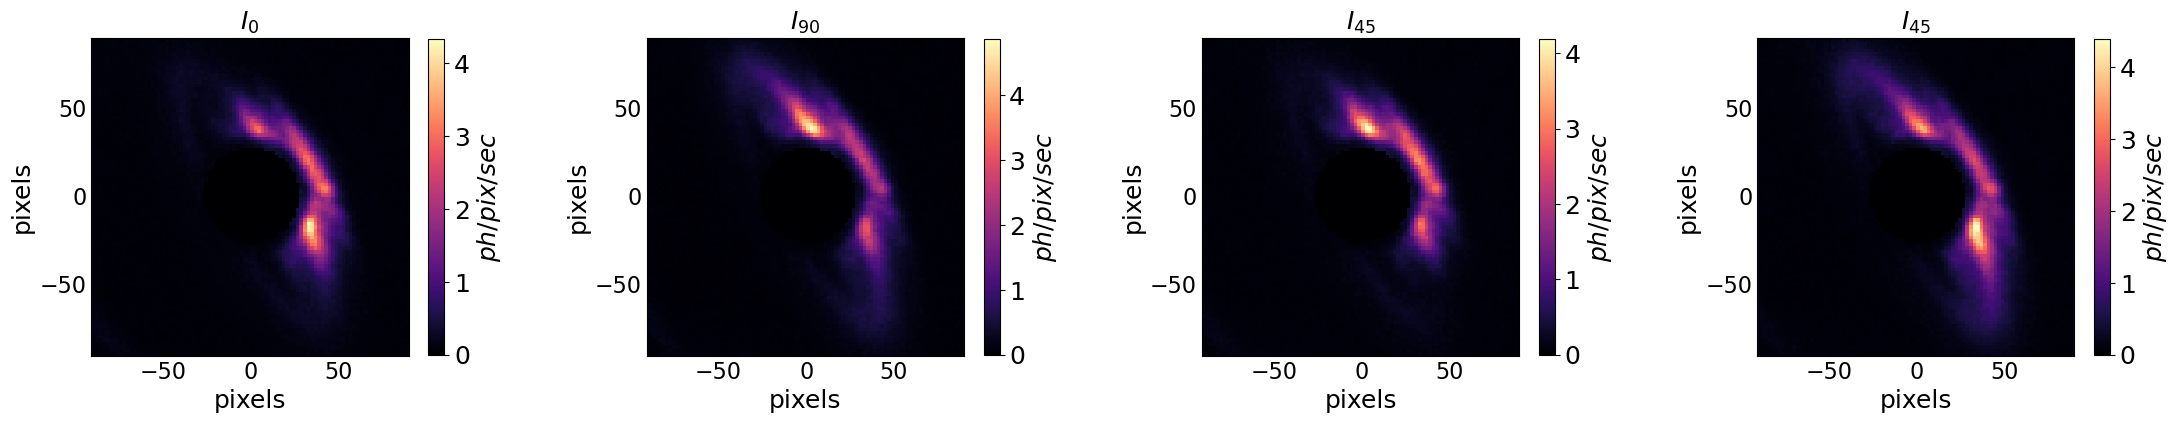

In [1307]:
px=181
xpix=(np.arange (-px+90, px-90, 1))
ypix=(np.arange (-px+90, px-90, 1))


fig = plt.figure(figsize=(25, 10))
ax1=fig.add_subplot(141)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im1=ax1.imshow(med_wd_0[90-45:90+45,90-45:90+45],cmap='magma',extent=[np.min(ypix),np.max(ypix),np.max(xpix),np.min(xpix)])
ax1.invert_yaxis()
ax1.set_ylabel('pixels',fontsize=18)
ax1.set_xlabel('pixels',fontsize=18)
ax1.set_title('$I_0$',fontsize=18)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.4)
cb.set_label("$ph/pix/sec$",fontsize=18)
cb.ax.tick_params(labelsize=18)

ax2=fig.add_subplot(142)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im2=ax2.imshow(med_wd_90[90-45:90+45,90-45:90+45],cmap='magma',extent=[np.min(ypix),np.max(ypix),np.max(xpix),np.min(xpix)])
ax2.invert_yaxis()
ax2.set_ylabel('pixels',fontsize=18)
ax2.set_xlabel('pixels',fontsize=18)
ax2.set_title('$I_{90}$',fontsize=18)
cb = fig.colorbar(im2,orientation='vertical',shrink=0.4)
cb.set_label("$ph/pix/sec$",fontsize=18)
cb.ax.tick_params(labelsize=18)
        
ax3=fig.add_subplot(143)
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')
ax3.minorticks_on()
ax3.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im3=ax3.imshow(med_wd_45[90-45:90+45,90-45:90+45],cmap='magma',extent=[np.min(ypix),np.max(ypix),np.max(xpix),np.min(xpix)])
ax3.invert_yaxis()
ax3.set_ylabel('pixels',fontsize=18)
ax3.set_xlabel('pixels',fontsize=18)
ax3.set_title('$I_{45}$',fontsize=18)
cb = fig.colorbar(im3,orientation='vertical',shrink=0.4)
cb.set_label("$ph/pix/sec$",fontsize=18)
cb.ax.tick_params(labelsize=18)

ax4=fig.add_subplot(144)
ax4.yaxis.set_ticks_position('both')
ax4.xaxis.set_ticks_position('both')
ax4.minorticks_on()
ax4.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im4=ax4.imshow(med_wd_135[90-45:90+45,90-45:90+45],cmap='magma',extent=[np.min(ypix),np.max(ypix),np.max(xpix),np.min(xpix)])
ax4.invert_yaxis()
ax4.set_ylabel('pixels',fontsize=18)
ax4.set_xlabel('pixels',fontsize=18)
ax4.set_title('$I_{45}$',fontsize=18)
cb = fig.colorbar(im4,orientation='vertical',shrink=0.4)
cb.set_label("$ph/pix/sec$",fontsize=18)
cb.ax.tick_params(labelsize=18)
fig.subplots_adjust(hspace=0.1, wspace=0.4, top=0.9, right=0.95)
#fig.savefig(disk_file_dir+'processed_disks_HR4796A.pdf', format='pdf', bbox_inches='tight')

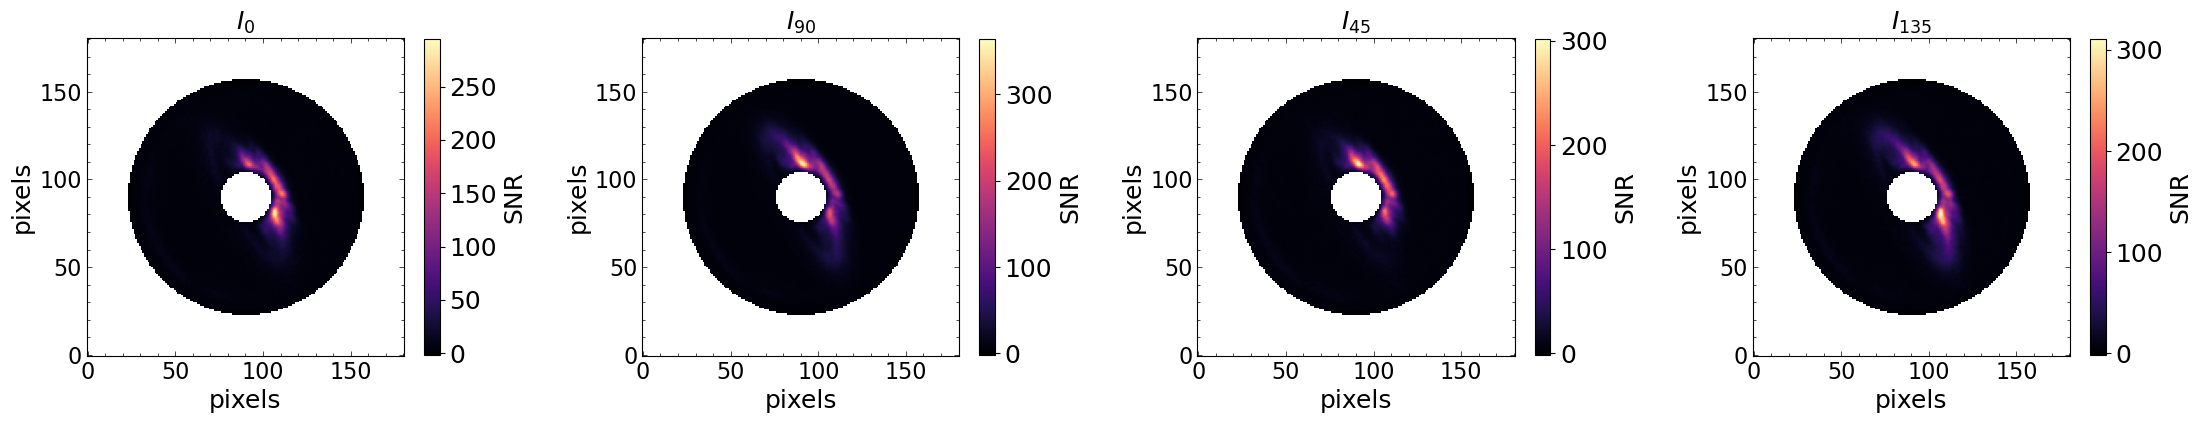

In [1308]:
fig = plt.figure(figsize=(25, 10))
ax1=fig.add_subplot(141)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im1=ax1.imshow(SNR_0,cmap='magma')
ax1.invert_yaxis()
ax1.set_ylabel('pixels',fontsize=18)
ax1.set_xlabel('pixels',fontsize=18)
ax1.set_title('$I_0$',fontsize=18)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.4)
cb.set_label("SNR",fontsize=18)
cb.ax.tick_params(labelsize=18)

ax2=fig.add_subplot(142)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im2=ax2.imshow(SNR_90,cmap='magma')
ax2.invert_yaxis()
ax2.set_ylabel('pixels',fontsize=18)
ax2.set_xlabel('pixels',fontsize=18)
ax2.set_title('$I_{90}$',fontsize=18)
cb = fig.colorbar(im2,orientation='vertical',shrink=0.4)
cb.set_label("SNR",fontsize=18)
cb.ax.tick_params(labelsize=18)
        
ax3=fig.add_subplot(143)
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')
ax3.minorticks_on()
ax3.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im3=ax3.imshow(SNR_45,cmap='magma')
ax3.invert_yaxis()
ax3.set_ylabel('pixels',fontsize=18)
ax3.set_xlabel('pixels',fontsize=18)
ax3.set_title('$I_{45}$',fontsize=18)
cb = fig.colorbar(im3,orientation='vertical',shrink=0.4)
cb.set_label("SNR",fontsize=18)
cb.ax.tick_params(labelsize=18)

ax4=fig.add_subplot(144)
ax4.yaxis.set_ticks_position('both')
ax4.xaxis.set_ticks_position('both')
ax4.minorticks_on()
ax4.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im4=ax4.imshow(SNR_135,cmap='magma')
ax4.invert_yaxis()
ax4.set_ylabel('pixels',fontsize=18)
ax4.set_xlabel('pixels',fontsize=18)
ax4.set_title('$I_{135}$',fontsize=18)
cb = fig.colorbar(im4,orientation='vertical',shrink=0.4)
cb.set_label("SNR",fontsize=18)
cb.ax.tick_params(labelsize=18)
    
fig.subplots_adjust(hspace=0.1, wspace=0.4, top=0.9, right=0.95)
#fig.savefig(disk_file_dir+'SNR_disks.pdf', format='pdf', bbox_inches='tight')

In [1309]:
Q_out=med_wd_0.astype(np.float64)-med_wd_90.astype(np.float64)
U_out=med_wd_45.astype(np.float64)-med_wd_135.astype(np.float64)
I_out=med_wd_0.astype(np.float64)+med_wd_90.astype(np.float64)

# Mueller matrix
Q_corr=9.99129287e-01*Q_out-3.07672427e-05*U_out
U_corr=-4.30741398e-05*Q_out+9.04726156e-01*U_out

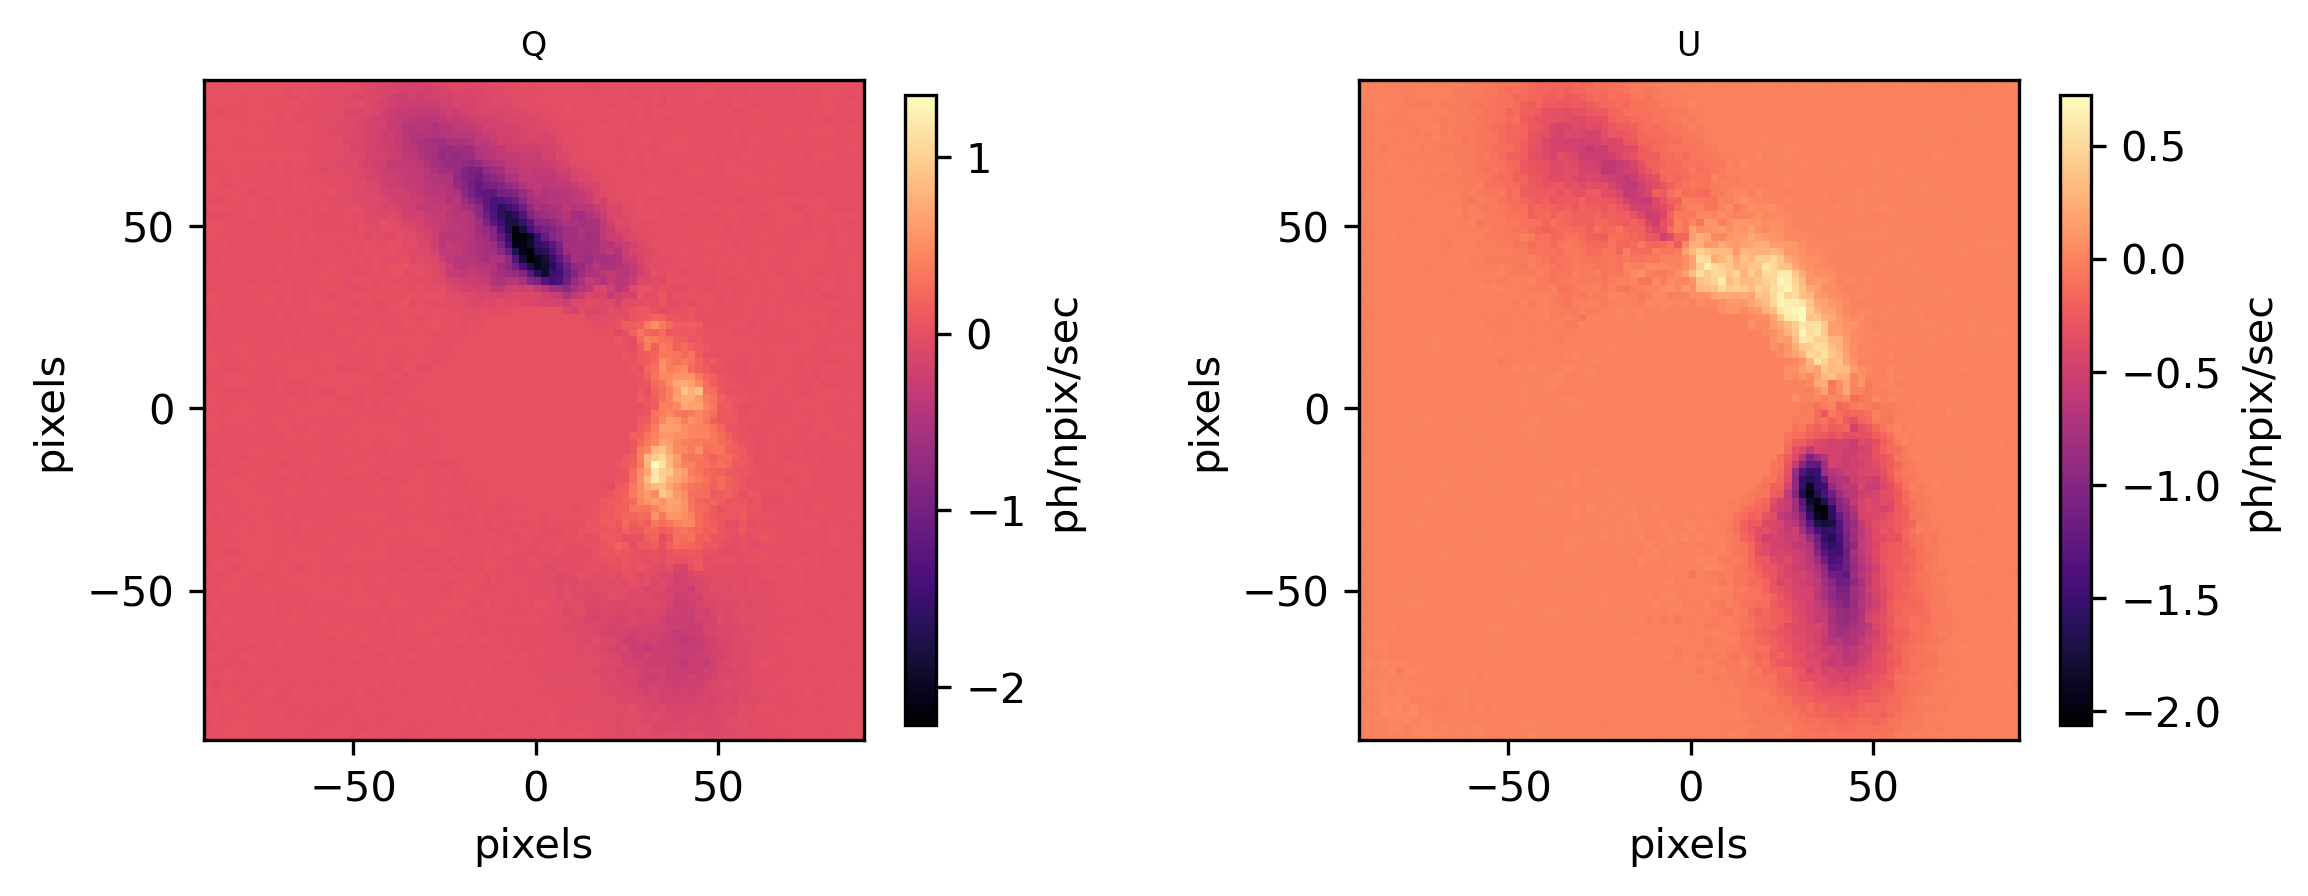

In [1310]:
px=181
psf_scale=0.0208 ##arcsecs/pixel
xpix=(np.arange (-px+90, px-90, 1))
ypix=(np.arange (-px+90, px-90, 1))

fig = plt.figure(figsize=(8, 5),dpi=300)
ax1=fig.add_subplot(121)
im1=ax1.imshow(Q_out[90-45:90+45,90-45:90+45],cmap='magma',extent=[np.min(ypix),np.max(ypix),np.max(xpix),np.min(xpix)])
ax1.invert_yaxis()
ax1.set_ylabel('pixels')
ax1.set_xlabel('pixels')
ax1.set_title('Q', fontsize=8)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.5)
cb.set_label('ph/npix/sec')
ax1.grid(False)

ax2=fig.add_subplot(122)
im2=ax2.imshow(U_out[90-45:90+45,90-45:90+45],cmap='magma',extent=[np.min(ypix),np.max(ypix),np.max(xpix),np.min(xpix)])
ax2.invert_yaxis()
ax2.set_ylabel('pixels')
ax2.set_xlabel('pixels')
ax2.set_title('U',fontsize=8)
cb = fig.colorbar(im2,orientation='vertical',shrink=0.5)
cb.set_label('ph/npix/sec')
ax2.grid(False)
fig.subplots_adjust(hspace=0.65, wspace=0.4, top=0.95, right=0.95)
#fig.savefig(disk_file_dir+'Stokes_output.pdf', format='pdf', bbox_inches='tight')

In [1311]:
xarc=(np.arange (-px+125, px-125, 1))*psf_scale

In [1320]:
np.seterr(invalid='ignore')
xarc=(np.arange (-int(px/2)+45, int(px/2)-45, 1))*psf_scale
yarc=(np.arange (-int(px/2)+45, int(px/2)-45, 1))*psf_scale
sq_as_per_pix=psf_scale**2
A=2.5*np.log10(sq_as_per_pix)
C=20.35871490486113 

X, Y = np.mgrid[(0):(181):181j, (0):(181):181j]
positions = np.vstack([X.ravel(), Y.ravel()])
pos=np.transpose(positions)

Phi=np.arctan((pos[:,0]-90)/(pos[:,1]-91))
Phi_new=np.reshape(Phi,(181,181))

Q_phi=Q_corr*np.cos(2*Phi_new)+U_corr*np.sin(2*Phi_new)
U_phi=-Q_corr*np.sin(2*Phi_new)+U_corr*np.cos(2*Phi_new)
I_out[I_out<0]=0

# calculating instrumental magnitudes -2.5log10(ct/s)+ZP+2.5log10(Area)
Q_mag=-2.5*np.log10(Q_phi)+C+A
U_mag=-2.5*np.log10(U_phi)+C+A
I_mag=-2.5*np.log10(I_out)+C+A

# calculating flux
Q_flux=10**(-0.4*Q_mag)*10**5
U_flux=10**(-0.4*U_mag)*10**5
I_flux=10**(-0.4*I_mag)*10**5



p_r=Q_flux/I_flux
theta=0.5*np.arctan2(U_out,Q_out)
p_r[p_r==inf]=0

Q_flux[np.isnan(Q_flux)]=0
U_flux[np.isnan(U_flux)]=0
p_r[np.isnan(p_r)]=0
I_flux[np.isnan(I_flux)]=0

theta[np.isnan(theta)]=0
p_r[p_r>0.9]=0
np.max(p_r)

/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_24486/1456226440.py:20: RuntimeWarning: divide by zero encountered in log10
  Q_mag=-2.5*np.log10(Q_phi)+C+A
/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_24486/1456226440.py:21: RuntimeWarning: divide by zero encountered in log10
  U_mag=-2.5*np.log10(U_phi)+C+A
/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_24486/1456226440.py:22: RuntimeWarning: divide by zero encountered in log10
  I_mag=-2.5*np.log10(I_out)+C+A
/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_24486/1456226440.py:31: RuntimeWarning: divide by zero encountered in true_divide
  p_r=Q_flux/I_flux


0.7641606112140015

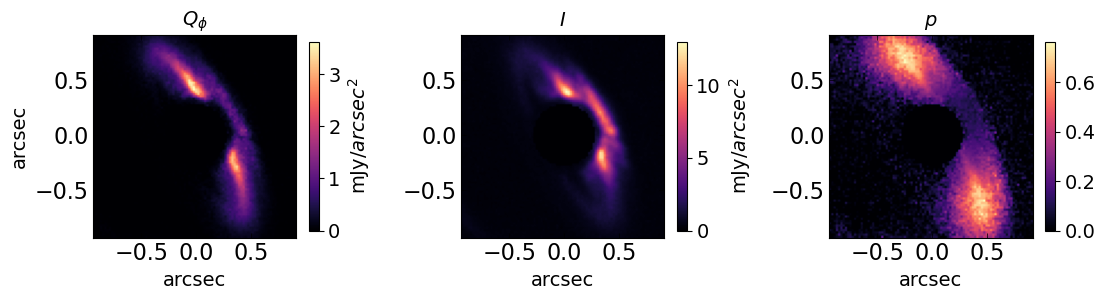

In [1323]:
fig = plt.figure(figsize=(12, 5))
ax1=fig.add_subplot(131)
im1=ax1.imshow(Q_flux[90-45:90+45,90-45:90+45],cmap='magma',extent=[np.min(yarc),np.max(yarc),np.max(xarc),np.min(xarc)])
ax1.invert_yaxis()
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
#ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('arcsec',fontsize=14)
ax1.set_xlabel('arcsec',fontsize=14)
ax1.set_title(r'$Q_{\phi}$',fontsize=14)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.45)
cb.set_label(u"mJy/$arcsec^2$",fontsize=14)
cb.ax.tick_params(labelsize=14)
ax1.grid(False)

ax2=fig.add_subplot(132)
im2=ax2.imshow(I_flux[90-45:90+45,90-45:90+45],cmap='magma',extent=[np.min(yarc),np.max(yarc),np.max(xarc),np.min(xarc)])
ax2.invert_yaxis()
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
#ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', width=0.5, labelsize=16)
#ax2.set_ylabel('arcsec',fontsize=14)
ax2.set_xlabel('arcsec',fontsize=14)
ax2.set_title(r'$I$',fontsize=14)
cb = fig.colorbar(im2,orientation='vertical',shrink=0.45)
cb.set_label(u"mJy/$arcsec^2$",fontsize=14)
cb.ax.tick_params(labelsize=14)
ax2.grid(False)

ax1=fig.add_subplot(133)
im1=ax1.imshow(p_r[90-45:90+45,90-45:90+45],cmap='magma',extent=[np.min(yarc),np.max(yarc),np.max(xarc),np.min(xarc)])
ax1.invert_yaxis()
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
#ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
#ax1.set_ylabel('arcsec',fontsize=14)
ax1.set_xlabel('arcsec',fontsize=14)
ax1.set_title('$p$',fontsize=14)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.45)
cb.ax.tick_params(labelsize=14)
ax1.grid(False)

#ax2=fig.add_subplot(224)
#im2=ax2.imshow(theta[90-45:90+45,90-45:90+45],cmap='magma',extent=[np.min(yarc),np.max(yarc),np.max(xarc),np.min(xarc)])
#ax2.invert_yaxis()
#ax2.set_ylabel('arcsec')
#ax2.set_xlabel('arcsec')
#ax2.set_title('$theta$')
#cb = fig.colorbar(im2,orientation='vertical')
#cb.set_label(u"\u03bcJy/$arcsec^2$")
#ax2.grid(False)
fig.subplots_adjust(hspace=0.65, wspace=0.45, top=0.95, right=0.95)
fig.savefig(disk_file_dir+'Ouput_pol.pdf', format='pdf', bbox_inches='tight')

In [1324]:
qx, qy=np.unravel_index(np.argmax(Q_flux), Q_flux.shape)
q_max=Q_flux[qx-1:qx+2,qy-1:qy+2]
i_max=I_flux[qx-1:qx+2,qy-1:qy+2]
np.mean(q_max/i_max)
np.std(q_max/i_max)

0.03994786033740039

In [1325]:
y, x = np.indices(Q_flux.shape)     # 0.0665AU/pixel
center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])
qx, qy=np.unravel_index(np.argmax(Q_flux), Q_flux.shape)
ix, iy=np.unravel_index(np.argmax(I_flux), I_flux.shape)
prx, pry =np.unravel_index(np.argmax(p_r), p_r.shape)
        
npix=2
        
Q_flux_lin=np.mean(Q_flux[qx-npix:qx+npix,:],axis=0)
I_flux_lin=np.mean(I_flux[qx-npix:qx+npix,:],axis=0)
p_r_lin   =np.mean(p_r[qx-npix:qx+npix,:],axis=0)

Q_flux_err=np.mean(np.std(Q_flux[qx-npix:qx+npix,:],axis=0))
I_flux_err=np.mean(np.std(I_flux[qx-npix:qx+npix,:],axis=0))
p_r_err  =np.mean(np.std(p_r[qx-npix:qx+npix,:],axis=0))

In [1163]:
q_max

array([[4.90857862, 6.11690629, 6.50503911],
       [5.89619033, 6.66619135, 6.48259966],
       [6.14276269, 6.34886243, 5.83615396]])

In [997]:
i_max

array([[26.47245212, 31.9279208 , 32.01988794],
       [29.56190982, 36.12606578, 33.7697615 ],
       [31.44257466, 35.91306994, 31.79646083]])

In [998]:
(q_max/i_max)

array([[0.27201875, 0.27485839, 0.23663443],
       [0.25792531, 0.25350019, 0.2245459 ],
       [0.21873781, 0.22724653, 0.20428872]])

In [1166]:
np.mean(q_max)

6.100364937278551

In [1167]:
np.std(q_max)

0.4972921826605498

In [1300]:
p_r_lin =np.mean(p_r[prx-npix:prx+npix,:],axis=0)
np.max(p_r_lin)

0.7009997584906921

In [881]:
p_r_err

0.0020115438119609804

In [1326]:
prx, pry =np.unravel_index(np.argmax(p_r), p_r.shape)
p_r[prx-1:prx+2,pry-1:pry+3]

array([[0.64721838, 0.63533251, 0.67370021, 0.70321049],
       [0.69802766, 0.76416061, 0.73137886, 0.70735022],
       [0.64193883, 0.75905233, 0.71159704, 0.68509752]])

In [1327]:
np.max(p_r[prx-1:prx+2,pry-1:pry+2])

0.7641606112140015

In [1328]:
np.std(p_r[prx-1:prx+2,pry-1:pry+3])

0.040719781801535786